TEAM 11 ASSIGNMENT

Preparing the Data set and creating the training and testing subsets to build a Naive Bayes system in Excel to analyze the strategy the company is using 

In [511]:
#importing packages
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
#naming the file
file = "./Team 11 - US Census Above 50k Predictor.csv"
#making a list for the headers.
headers = ["age", "occupation", "type_of_employment", "working_hours","cash_proceeds", 
          "level_of_education", "years_of_education", "household_relationship",
          "civil_status", "ethnicity","gender","nationality","target_income"]
#importing the csv file
census = pd.read_csv(filepath_or_buffer = file,
                                    sep = ',',
                                 header = 0, 
                                  names = headers,
                       skipinitialspace = True,
                              na_values = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan',
        '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', ' nan', ' nan',' nan',
        'nan', 'null', '?']) 
census.head(n=10)

,age,occupation,type_of_employment,working_hours,cash_proceeds,level_of_education,years_of_education,household_relationship,civil_status,ethnicity,gender,nationality,target_income
0,29,Sales,Private,50,0,Bachelors,13,Never-married,Not-in-family,White,Male,United-States,<=50K
1,29,Sales,Private,50,0,Some-college,10,Never-married,Other-relative,White,Male,United-States,<=50K
2,37,Exec-managerial,Private,50,0,Bachelors,13,Married-civ-spouse,Husband,White,Male,United-States,>50K
3,52,Exec-managerial,Self-emp-not-inc,95,0,Some-college,10,Married-civ-spouse,Husband,White,Male,United-States,>50K
4,41,Prof-specialty,State-gov,40,0,Bachelors,13,Never-married,Not-in-family,White,Male,United-States,<=50K
5,23,Handlers-cleaners,Private,16,0,HS-grad,9,Never-married,Own-child,Black,Female,United-States,<=50K
6,52,Prof-specialty,Private,60,6849,Masters,14,Divorced,Not-in-family,White,Female,United-States,<=50K
7,26,Machine-op-inspct,Private,40,0,HS-grad,9,Married-civ-spouse,Husband,White,Male,United-States,>50K
8,56,Machine-op-inspct,Private,40,0,HS-grad,9,Married-civ-spouse,Husband,White,Male,Italy,>50K
9,43,Machine-op-inspct,Private,21,0,HS-grad,9,Married-civ-spouse,Wife,Black,Female,Trinadad&Tobago,<=50K


Analyzing the descriptive statistics of the variables for further decisions on making the best model. 

In [512]:
#descriptive statistics for numerical variables
census.describe(include = "number").round(decimals = 2)

,age,working_hours,cash_proceeds,years_of_education
count,23997.00,23997.00,23997.00,23997.00
mean,38.58,40.47,1008.07,10.07
std,13.67,12.45,7584.90,2.57
min,17.00,1.00,-4356.00,1.00
25%,28.00,40.00,0.00,9.00
50%,37.00,40.00,0.00,10.00
75%,48.00,45.00,0.00,12.00
max,90.00,99.00,99999.00,16.00


In [513]:
#descriptive statistics for categorical variables
census.describe(include = "object").round(decimals = 2)

,occupation,type_of_employment,level_of_education,household_relationship,civil_status,ethnicity,gender,nationality,target_income
count,22529,22534,23997,23997,23997,23997,23997,23568,23997
unique,14,8,16,7,6,5,2,41,2
top,Prof-specialty,Private,HS-grad,Married-civ-spouse,Husband,White,Male,United-States,<=50K
freq,3038,16677,7698,11069,9753,20472,16047,21481,18225


Searching the frequency of each variable that will help us on making decisions on how 
to group the variables in categories

In [515]:
#creating a for loop to have the frequency of the variables using value_counts.
for column in census:
    value_count_variable = census[column].value_counts(normalize = True,
                                                       sort = True, 
                                                       ascending = True).round(decimals = 2)*100
    print(value_count_variable)
    print("-"*40)

87    0.00
85    0.00
83    0.00
84    0.00
82    0.00
      ... 
36    0.03
34    0.03
33    0.03
35    0.03
31    0.03
Name: age, Length: 71, dtype: float64
----------------------------------------
Armed-Forces         0.00
Priv-house-serv      0.00
Protective-serv      0.02
Tech-support         0.03
Farming-fishing      0.03
Handlers-cleaners    0.05
Transport-moving     0.05
Machine-op-inspct    0.07
Other-service        0.11
Sales                0.12
Adm-clerical         0.12
Craft-repair         0.13
Exec-managerial      0.13
Prof-specialty       0.13
Name: occupation, dtype: float64
----------------------------------------
Never-worked        0.00
Without-pay         0.00
Federal-gov         0.03
Self-emp-inc        0.04
State-gov           0.04
Local-gov           0.07
Self-emp-not-inc    0.08
Private             0.74
Name: type_of_employment, dtype: float64
----------------------------------------
82    0.00
74    0.00
92    0.00
94    0.00
87    0.00
      ... 
35    0.04
60 

In [516]:
#information of our Data Frame  
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23997 entries, 0 to 23996
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     23997 non-null  int64 
 1   occupation              22529 non-null  object
 2   type_of_employment      22534 non-null  object
 3   working_hours           23997 non-null  int64 
 4   cash_proceeds           23997 non-null  int64 
 5   level_of_education      23997 non-null  object
 6   years_of_education      23997 non-null  int64 
 7   household_relationship  23997 non-null  object
 8   civil_status            23997 non-null  object
 9   ethnicity               23997 non-null  object
 10  gender                  23997 non-null  object
 11  nationality             23568 non-null  object
 12  target_income           23997 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.4+ MB


In [517]:
#categorical variables 
categorical_cols = census.select_dtypes('object').columns.tolist()
print(categorical_cols)

['occupation', 'type_of_employment', 'level_of_education', 'household_relationship', 'civil_status', 'ethnicity', 'gender', 'nationality', 'target_income']


Identifying variables that have missing values to treat them later. And make decision on how we are going to treat them 
whether dropping them off or replacing them.

In [518]:
#identifying variables that have missing values. 
census.isnull().any()

age                       False
occupation                 True
type_of_employment         True
working_hours             False
cash_proceeds             False
level_of_education        False
years_of_education        False
household_relationship    False
civil_status              False
ethnicity                 False
gender                    False
nationality                True
target_income             False
dtype: bool

In [519]:
#How many missing values does each variable have. 
census.isnull().sum(axis= 0)

age                          0
occupation                1468
type_of_employment        1463
working_hours                0
cash_proceeds                0
level_of_education           0
years_of_education           0
household_relationship       0
civil_status                 0
ethnicity                    0
gender                       0
nationality                429
target_income                0
dtype: int64

In [520]:
#flagging missing values
for column in census:
    if census[column].isnull().sum() > 0:
        census["m_" + column] = census[column].isnull().astype(int)

In [521]:
#printing the sums of missing value flags. 
print(f"""Sums of Missing Value Flags
--------------------------
{census.iloc[:,-3:].sum()}""")

Sums of Missing Value Flags
--------------------------
m_occupation            1468
m_type_of_employment    1463
m_nationality            429
dtype: int64


In [458]:
y_dataframe = pd.DataFrame.copy(census.iloc[: , -1])
y_dataframe.head(n=5)

0    0
1    0
2    0
3    0
4    0
Name: mv_sum, dtype: int64

In [459]:
#creating a new column to sum all the missing values
census['mv_sum'] =   census["m_occupation"] + \
                     census["m_type_of_employment"]+ \
                     census["m_nationality"]


# checking results
print(f"""

Number of Missing Values per Observation (Pct)
----------------------------------------------
{(census['mv_sum'].value_counts(normalize = True,
                                  sort      = True,
                                  ascending = True)*100).round(2)}
""") 



Number of Missing Values per Observation (Pct)
----------------------------------------------
3     0.11
1     1.70
2     5.99
0    92.20
Name: mv_sum, dtype: float64



In [460]:
# isolating the y variable 

# the following code makes the new DataFrame independent
census_dropped = pd.DataFrame.copy(census)


# using dropna() for df_dropped
census_dropped = census_dropped.dropna().round(2)
 

# checking to see if all missing values have been dropped
print(census_dropped.isnull().sum())

age                       0
occupation                0
type_of_employment        0
working_hours             0
cash_proceeds             0
level_of_education        0
years_of_education        0
household_relationship    0
civil_status              0
ethnicity                 0
gender                    0
nationality               0
target_income             0
m_occupation              0
m_type_of_employment      0
m_nationality             0
mv_sum                    0
dtype: int64


Analyzing whether to drop or impute the missing values with a categorical variable to see the difference.

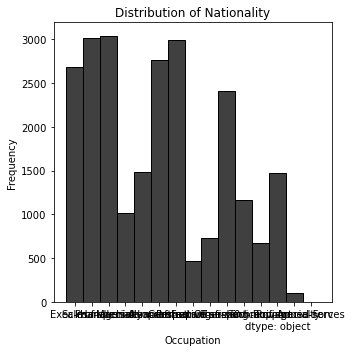

In [534]:
# histogram for occupation

fig, ax = plt.subplots(figsize = [5, 5])
sns.histplot(data  = census_dropped,
             x     ='occupation',
             bins  = 'fd',
             kde   = False,
             color = 'black')


# this adds a title
plt.title(label = "Distribution of Occupation")


# this adds an x-label
plt.xlabel(xlabel = 'Occupation')


# this add a y-label
plt.ylabel(ylabel = 'Frequency')


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

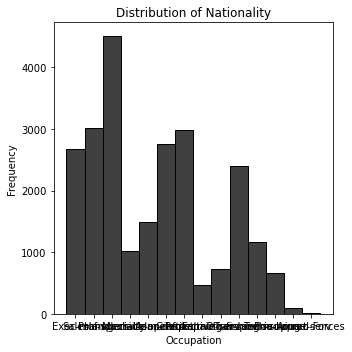

In [544]:
fig, ax = plt.subplots(figsize = [5, 5])
sns.histplot(data  = census,
             x     ='occupation',
             bins  = 'fd',
             kde   = False,
             color = 'black')


# this adds a title
plt.title(label = "Distribution of Occupation")


# this adds an x-label
plt.xlabel(xlabel = 'Occupation')


# this add a y-label
plt.ylabel(ylabel = 'Frequency')


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()


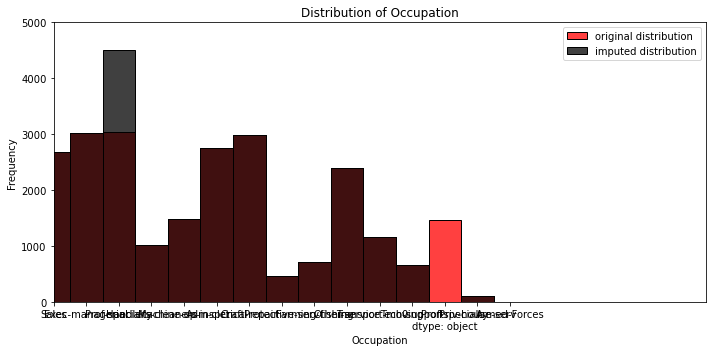

In [553]:
# setting figure size
fig, ax = plt.subplots(figsize = [10, 5],
                       sharex = True, # sharing x-axis between visualizations
                       sharey = True) # sharing y-axis between visualizations


# histogram for carat
sns.histplot(data  = census_dropped,
             x     = 'occupation',
             bins  = "fd",
             kde   = False, # drawing theoretical distribution
             color = 'red')


# histogram for carat
sns.histplot(data  = census,
             x     = 'occupation',
             bins  = "fd",
             kde   = False, # drawing theoretical distribution
             color = 'black')


# titles, labels, and formatting
plt.title(label   = "Distribution of Occupation")
plt.xlabel(xlabel = 'Occupation')
plt.ylabel(ylabel = 'Frequency')
plt.xlim(0.0, 20) # setting x-axis range
plt.ylim(0.0, 5000) # setting y-axis range


# this adds a legend
plt.legend(labels =  ['original distribution',
                      'imputed distribution'])

# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()


Decided to Impute the missing values with the median or mode depending on the type of variable. 

In [522]:
#softcoding in case another dataset has different variables with missing values.
#creating a for loop to replace the missing values of each variable. 
for column in census: 
#using the mode for categorical variables.
    if census[column].dtype == "object" and census[column].isnull().sum() > 0:
        var_mode = census[column].mode()
        census[column].fillna(value = var_mode[0],
                              inplace = True)
#using the median for numerical variables 
    elif census[column].dtype == "int64"and census[column].isnull().sum() > 0:
        var_median = census[column].median()
        census[column].fillna(value = var_median,
                              inplace = True)
# checking to make sure missing values are filled in. 
print(census.isnull().any())

age                       False
occupation                False
type_of_employment        False
working_hours             False
cash_proceeds             False
level_of_education        False
years_of_education        False
household_relationship    False
civil_status              False
ethnicity                 False
gender                    False
nationality               False
target_income             False
m_occupation              False
m_type_of_employment      False
m_nationality             False
dtype: bool


To create a better model we need to regroup the variables in categories. This regrouping is made by the information we have on the descriptive statistics and frequencies of each variable shown above. 

In [469]:
#creating a for loop to regroup age

for i, column in census.iterrows():
    # conditionals to create the new groups. 
    if census.loc[i, 'age']  <  25:
        census.loc[i, 'age'] = "Age_young"
        
    elif census.loc[i, 'age'] >= 25 and census.loc[i, 'age']< 50:
        census.loc[i, 'age'] = "Age_adults"
        
        
    elif census.loc[i, 'age'] >= 50:
        census.loc[i, 'age'] = "Age_senior"

    # safety net
    else:
        census.loc[i, 'age'] = 'something went wrong'
    

In [470]:
#making sure the elements of each variable has been replaced. 
census.head( )

,age,occupation,type_of_employment,working_hours,cash_proceeds,level_of_education,years_of_education,household_relationship,civil_status,ethnicity,gender,nationality,target_income
0,Age_adults,Sales,Private,50,0,Bachelors,13,Never-married,Not-in-family,White,Male,United-States,<=50K
1,Age_adults,Sales,Private,50,0,Some-college,10,Never-married,Other-relative,White,Male,United-States,<=50K
2,Age_adults,Exec-managerial,Private,50,0,Bachelors,13,Married-civ-spouse,Husband,White,Male,United-States,>50K
3,Age_senior,Exec-managerial,Self-emp-not-inc,95,0,Some-college,10,Married-civ-spouse,Husband,White,Male,United-States,>50K
4,Age_adults,Prof-specialty,State-gov,40,0,Bachelors,13,Never-married,Not-in-family,White,Male,United-States,<=50K


In [471]:
#creating a for loop to regroup working_hours

for i, column in census.iterrows():
    #conditionals to create the new groups for working hours. 
    if census.loc[i, 'working_hours']  <= 40:
        census.loc[i, 'working_hours'] = "WH_Part_time"
        
    elif census.loc[i, 'working_hours'] > 40:
        census.loc[i, 'working_hours'] = "WH_Full_time"
    #safety net
    else:
        census.loc[i, 'working_hours'] = "something went wrong"

In [472]:
#making sure the elements of each variable has been replaced. 
census.head()

,age,occupation,type_of_employment,working_hours,cash_proceeds,level_of_education,years_of_education,household_relationship,civil_status,ethnicity,gender,nationality,target_income
0,Age_adults,Sales,Private,WH_Full_time,0,Bachelors,13,Never-married,Not-in-family,White,Male,United-States,<=50K
1,Age_adults,Sales,Private,WH_Full_time,0,Some-college,10,Never-married,Other-relative,White,Male,United-States,<=50K
2,Age_adults,Exec-managerial,Private,WH_Full_time,0,Bachelors,13,Married-civ-spouse,Husband,White,Male,United-States,>50K
3,Age_senior,Exec-managerial,Self-emp-not-inc,WH_Full_time,0,Some-college,10,Married-civ-spouse,Husband,White,Male,United-States,>50K
4,Age_adults,Prof-specialty,State-gov,WH_Part_time,0,Bachelors,13,Never-married,Not-in-family,White,Male,United-States,<=50K


In [473]:
#descriptive statistics to make the categories in relation of the average. 
census["cash_proceeds"].describe().round(decimals = 2)

count    23997.00
mean      1008.07
std       7584.90
min      -4356.00
25%          0.00
50%          0.00
75%          0.00
max      99999.00
Name: cash_proceeds, dtype: float64

In [474]:
#regrouping cash_proceeds based on the descriptive statistic and frequencies. 

for i, column in census.iterrows():
    #conditionals to create the new groups for working hours.
    if census.loc[i, 'cash_proceeds']  <  0:
        census.loc[i, 'cash_proceeds'] = " proceed_negative"
        
    elif census.loc[i, 'cash_proceeds'] >= 0 and census.loc[i, 'cash_proceeds']<= 1000:
        census.loc[i, 'cash_proceeds'] = "proceed_average"
        
        
    elif census.loc[i, 'cash_proceeds'] > 1000:
        census.loc[i, 'cash_proceeds'] = "proceed_above_average"
    #safety net
    else:
        census.loc[i, 'cash_proceeds'] = "something went wrong"

In [476]:
#descriptive statistics for year of eduaction analyze and group the variable. 
census["years_of_education"].describe()

count    23997.000000
mean        10.074926
std          2.574456
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: years_of_education, dtype: float64

In [477]:
#finding the unique values for years of eduaction
census["years_of_education"].unique()

array([13, 10,  9, 14, 11,  7,  5, 12, 16, 15,  6,  3,  4,  2,  8,  1])

In [478]:
#regrouping year_of_education based on the descriptive statistic and frequencies.

for i, column in census.iterrows():
    # conditionals to change the values in the new column
    if census.loc[i, 'years_of_education']  <  12:
        census.loc[i, 'years_of_education'] = "basic_education"
        
    elif census.loc[i, 'years_of_education'] >= 12: 
        census.loc[i, 'years_of_education'] = "professional_education"

    # safety net
    else:
        census.loc[i, 'years_of_education'] = "something went wrong"

In [479]:
#making sure the elements of each variable have been replaced. 
census.head(n = 5)

,age,occupation,type_of_employment,working_hours,cash_proceeds,level_of_education,years_of_education,household_relationship,civil_status,ethnicity,gender,nationality,target_income
0,Age_adults,Sales,Private,WH_Full_time,proceed_average,Bachelors,professional_education,Never-married,Not-in-family,White,Male,United-States,<=50K
1,Age_adults,Sales,Private,WH_Full_time,proceed_average,Some-college,basic_education,Never-married,Other-relative,White,Male,United-States,<=50K
2,Age_adults,Exec-managerial,Private,WH_Full_time,proceed_average,Bachelors,professional_education,Married-civ-spouse,Husband,White,Male,United-States,>50K
3,Age_senior,Exec-managerial,Self-emp-not-inc,WH_Full_time,proceed_average,Some-college,basic_education,Married-civ-spouse,Husband,White,Male,United-States,>50K
4,Age_adults,Prof-specialty,State-gov,WH_Part_time,proceed_average,Bachelors,professional_education,Never-married,Not-in-family,White,Male,United-States,<=50K


In [480]:
#finding the unique values for occupation
census["occupation"].unique()

array(['Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners',
       'Machine-op-inspct', 'Adm-clerical', 'Craft-repair',
       'Protective-serv', 'Farming-fishing', 'Other-service',
       'Transport-moving', 'Tech-support', nan, 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [481]:
#regrouping categorical variables 
#regrouping occupationbased on the descriptive statistic and frequencies.
census["occupation"] = census["occupation"].map ( { 'Sales'            : "Occ_white_collar",
                                                    'Exec-managerial'  : "Occ_white_collar",
                                                    'Protective-serv'  : "Occ_service",
                                                    'Prof-specialty'   : "Occ_white_collar",
                                                    "Handlers-cleaners": "Occ_blue_collar",
                                                    'Machine-op-inspct': "Occ_white_collar",
                                                    'Adm-clerical'     : "Occ_white_collar",
                                                    'Craft-repair'     : "Occ_blue_collar",
                                                    'Protective-serv'  : "Occ_service",
                                                    'Farming-fishing'  : "Occ_blue_collar",
                                                    'Other-service'    : "Occ_service",
                                                    'Transport-moving' : "Occ_blue_collar",
                                                    'Tech-support'     : "Occ_white_collar",
                                                    'Priv-house-serv'  : "Occ_service",
                                                    'Armed-Forces'     : "Occ_service"})

In [482]:
#making sure the elements of each variable has been replaced.
census.head(n=5)

,age,occupation,type_of_employment,working_hours,cash_proceeds,level_of_education,years_of_education,household_relationship,civil_status,ethnicity,gender,nationality,target_income
0,Age_adults,Occ_white_collar,Private,WH_Full_time,proceed_average,Bachelors,professional_education,Never-married,Not-in-family,White,Male,United-States,<=50K
1,Age_adults,Occ_white_collar,Private,WH_Full_time,proceed_average,Some-college,basic_education,Never-married,Other-relative,White,Male,United-States,<=50K
2,Age_adults,Occ_white_collar,Private,WH_Full_time,proceed_average,Bachelors,professional_education,Married-civ-spouse,Husband,White,Male,United-States,>50K
3,Age_senior,Occ_white_collar,Self-emp-not-inc,WH_Full_time,proceed_average,Some-college,basic_education,Married-civ-spouse,Husband,White,Male,United-States,>50K
4,Age_adults,Occ_white_collar,State-gov,WH_Part_time,proceed_average,Bachelors,professional_education,Never-married,Not-in-family,White,Male,United-States,<=50K


In [483]:
#finding the unique values for level of eduaction
census["level_of_education"].unique()

array(['Bachelors', 'Some-college', 'HS-grad', 'Masters', 'Assoc-voc',
       '11th', '9th', 'Assoc-acdm', 'Doctorate', 'Prof-school', '10th',
       '5th-6th', '7th-8th', '1st-4th', '12th', 'Preschool'], dtype=object)

In [484]:
#regrouping level of education whether they graduate from college or no. 
census["level_of_education"] = census["level_of_education"].map ( { "Bachelors"   : "grad_college",
                                                                    "Some-college" : "not_grad_coll",
                                                                    "HS-grad"     : "not_grad_coll",
                                                                    "Masters"     : "grad_college",
                                                                    "Assoc-voc"   : "grad_college",
                                                                    "11th"        : "not_grad_coll", 
                                                                    "9th"         : "not_grad_coll",
                                                                    "Assoc-acdm"  : "assoc-acdm",
                                                                    "Doctorate"   : "grad_college",
                                                                    "Prof-school" : "grad_college",
                                                                    "10th"       : "not_grad_coll",
                                                                    "5th-6th"    : "not_grad_coll",
                                                                    "7th-8th"     : "not_grad_coll",
                                                                    "1st-4th"    : "not_grad_coll",
                                                                    "12th"       : "not_grad_coll",
                                                                    "Preschool"   : "not_grad_coll"} )

In [485]:
#making sure the elements of each variable has been replaced.
census.head(n = 5)

,age,occupation,type_of_employment,working_hours,cash_proceeds,level_of_education,years_of_education,household_relationship,civil_status,ethnicity,gender,nationality,target_income
0,Age_adults,Occ_white_collar,Private,WH_Full_time,proceed_average,grad_college,professional_education,Never-married,Not-in-family,White,Male,United-States,<=50K
1,Age_adults,Occ_white_collar,Private,WH_Full_time,proceed_average,not_grad_coll,basic_education,Never-married,Other-relative,White,Male,United-States,<=50K
2,Age_adults,Occ_white_collar,Private,WH_Full_time,proceed_average,grad_college,professional_education,Married-civ-spouse,Husband,White,Male,United-States,>50K
3,Age_senior,Occ_white_collar,Self-emp-not-inc,WH_Full_time,proceed_average,not_grad_coll,basic_education,Married-civ-spouse,Husband,White,Male,United-States,>50K
4,Age_adults,Occ_white_collar,State-gov,WH_Part_time,proceed_average,grad_college,professional_education,Never-married,Not-in-family,White,Male,United-States,<=50K


In [486]:
#finding the unique values for household relationship.
census["household_relationship"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Widowed', 'Married-AF-spouse',
       'Separated'], dtype=object)

In [525]:
#regrouping the variable for househould relationship whether they are HH spouse or other. 
census["household_relationship"] = census["household_relationship"].map ( { 'Never-married' : "HouseH_other",
                                                                            'Married-civ-spouse':"HouseH_spouse",
                                                                           'Divorced': "HouseH_other",
                                                                           'Married-spouse-absent': "HouseH_spouse",
                                                                           'Widowed': "HouseH_other",
                                                                           'Married-AF-spouse': "HouseH_spouse",
                                                                           'Separated': "HouseH_other"} )

In [528]:
#making sure the elements of each variable has been replaced.
census.head(n=5)

,age,occupation,type_of_employment,working_hours,cash_proceeds,level_of_education,years_of_education,household_relationship,civil_status,ethnicity,gender,nationality,target_income,m_occupation,m_type_of_employment,m_nationality
0,29,Sales,Private,50,0,Bachelors,13,HouseH_other,Not-in-family,White,Male,United-States,<=50K,0,0,0
1,29,Sales,Private,50,0,Some-college,10,HouseH_other,Other-relative,White,Male,United-States,<=50K,0,0,0
2,37,Exec-managerial,Private,50,0,Bachelors,13,HouseH_spouse,Husband,White,Male,United-States,>50K,0,0,0
3,52,Exec-managerial,Self-emp-not-inc,95,0,Some-college,10,HouseH_spouse,Husband,White,Male,United-States,>50K,0,0,0
4,41,Prof-specialty,State-gov,40,0,Bachelors,13,HouseH_other,Not-in-family,White,Male,United-States,<=50K,0,0,0


In [489]:
#finding the unique values for civil status
census["civil_status"].unique()

array(['Not-in-family', 'Other-relative', 'Husband', 'Own-child', 'Wife',
       'Unmarried'], dtype=object)

In [490]:
#regrouping the variable for civil status whether they are single or married. 
census["civil_status"] = census["civil_status"].map({'Not-in-family' : 'cs_single', 
                                                     'Other-relative': 'cs_single',
                                                     'Husband': "cs_married",
                                                     'Own-child': "cs_single",
                                                     'Wife': "cs_married",
                                                     'Unmarried': "cs_single"} )

In [491]:
#making sure the elements of each variable has been replaced.
census.head()

,age,occupation,type_of_employment,working_hours,cash_proceeds,level_of_education,years_of_education,household_relationship,civil_status,ethnicity,gender,nationality,target_income
0,Age_adults,Occ_white_collar,Private,WH_Full_time,proceed_average,grad_college,professional_education,HouseH_other,cs_single,White,Male,United-States,<=50K
1,Age_adults,Occ_white_collar,Private,WH_Full_time,proceed_average,not_grad_coll,basic_education,HouseH_other,cs_single,White,Male,United-States,<=50K
2,Age_adults,Occ_white_collar,Private,WH_Full_time,proceed_average,grad_college,professional_education,HouseH_spouse,cs_married,White,Male,United-States,>50K
3,Age_senior,Occ_white_collar,Self-emp-not-inc,WH_Full_time,proceed_average,not_grad_coll,basic_education,HouseH_spouse,cs_married,White,Male,United-States,>50K
4,Age_adults,Occ_white_collar,State-gov,WH_Part_time,proceed_average,grad_college,professional_education,HouseH_other,cs_single,White,Male,United-States,<=50K


In [492]:
#finding the unique values for type of employement.
census["type_of_employment"].unique()

array(['Private', 'Self-emp-not-inc', 'State-gov', 'Self-emp-inc', nan,
       'Local-gov', 'Federal-gov', 'Never-worked', 'Without-pay'],
      dtype=object)

In [494]:
#regrouping type of employment wether its private, public or unemployed.  
census["type_of_employment"] = census["type_of_employment"].map({'Private': "private_job", 
                                                                 'Self-emp-not-inc': "private_job", 
                                                                 'State-gov': "public_job", 
                                                                 'Self-emp-inc': "private_job",
                                                                 'Local-gov': "public_job", 
                                                                 'Federal-gov': "public_job",
                                                                 'Never-worked': "unemployed_job", 
                                                                 'Without-pay': "unemployed_job"} )

In [495]:
#making sure the elements of each variable has been replaced.
census.head(n = 5)

,age,occupation,type_of_employment,working_hours,cash_proceeds,level_of_education,years_of_education,household_relationship,civil_status,ethnicity,gender,nationality,target_income
0,Age_adults,Occ_white_collar,private_job,WH_Full_time,proceed_average,grad_college,professional_education,HouseH_other,cs_single,White,Male,United-States,<=50K
1,Age_adults,Occ_white_collar,private_job,WH_Full_time,proceed_average,not_grad_coll,basic_education,HouseH_other,cs_single,White,Male,United-States,<=50K
2,Age_adults,Occ_white_collar,private_job,WH_Full_time,proceed_average,grad_college,professional_education,HouseH_spouse,cs_married,White,Male,United-States,>50K
3,Age_senior,Occ_white_collar,private_job,WH_Full_time,proceed_average,not_grad_coll,basic_education,HouseH_spouse,cs_married,White,Male,United-States,>50K
4,Age_adults,Occ_white_collar,public_job,WH_Part_time,proceed_average,grad_college,professional_education,HouseH_other,cs_single,White,Male,United-States,<=50K


In [496]:
#finding the unique values for ethnicity to make the regrouping.
census["ethnicity"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [497]:
#regrouping type of employment whether they are white or other since white has the highest frequencies and the other are very low. 
census["ethnicity"] = census["ethnicity"].map({'White': "white",
                                               'Black': "other",
                                               'Asian-Pac-Islander': "other",
                                               'Amer-Indian-Eskimo': "other",
                                               'Other': "other"} )

In [498]:
#making sure the elements of each variable has been replaced.
census.head(n=10)

,age,occupation,type_of_employment,working_hours,cash_proceeds,level_of_education,years_of_education,household_relationship,civil_status,ethnicity,gender,nationality,target_income
0,Age_adults,Occ_white_collar,private_job,WH_Full_time,proceed_average,grad_college,professional_education,HouseH_other,cs_single,white,Male,United-States,<=50K
1,Age_adults,Occ_white_collar,private_job,WH_Full_time,proceed_average,not_grad_coll,basic_education,HouseH_other,cs_single,white,Male,United-States,<=50K
2,Age_adults,Occ_white_collar,private_job,WH_Full_time,proceed_average,grad_college,professional_education,HouseH_spouse,cs_married,white,Male,United-States,>50K
3,Age_senior,Occ_white_collar,private_job,WH_Full_time,proceed_average,not_grad_coll,basic_education,HouseH_spouse,cs_married,white,Male,United-States,>50K
4,Age_adults,Occ_white_collar,public_job,WH_Part_time,proceed_average,grad_college,professional_education,HouseH_other,cs_single,white,Male,United-States,<=50K
5,Age_young,Occ_blue_collar,private_job,WH_Part_time,proceed_average,not_grad_coll,basic_education,HouseH_other,cs_single,other,Female,United-States,<=50K
6,Age_senior,Occ_white_collar,private_job,WH_Full_time,proceed_above_average,grad_college,professional_education,HouseH_other,cs_single,white,Female,United-States,<=50K
7,Age_adults,Occ_white_collar,private_job,WH_Part_time,proceed_average,not_grad_coll,basic_education,HouseH_spouse,cs_married,white,Male,United-States,>50K
8,Age_senior,Occ_white_collar,private_job,WH_Part_time,proceed_average,not_grad_coll,basic_education,HouseH_spouse,cs_married,white,Male,Italy,>50K
9,Age_adults,Occ_white_collar,private_job,WH_Part_time,proceed_average,not_grad_coll,basic_education,HouseH_spouse,cs_married,other,Female,Trinadad&Tobago,<=50K


In [499]:
#finding the unique values for nationality.
census["nationality"].unique()

array(['United-States', 'Italy', 'Trinadad&Tobago', nan, 'Taiwan',
       'Ireland', 'Poland', 'Mexico', 'England', 'Jamaica', 'China',
       'India', 'Guatemala', 'Philippines', 'Puerto-Rico', 'South',
       'Greece', 'France', 'Canada', 'Scotland', 'Vietnam', 'Nicaragua',
       'Haiti', 'Honduras', 'Japan', 'El-Salvador', 'Cuba', 'Germany',
       'Dominican-Republic', 'Iran', 'Peru', 'Portugal', 'Hong',
       'Cambodia', 'Thailand', 'Ecuador', 'Columbia', 'Yugoslavia',
       'Laos', 'Outlying-US(Guam-USVI-etc)', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [500]:
#regrouping nationality wether they are from the US or not. 
census["nationality"] = census["nationality"].map({'United-States': "US", 
                                                   'Italy': "not_US", 
                                                   'Trinadad&Tobago': "not_US",
                                                   'Taiwan': "not_US",
                                                   'Ireland': "not_US", 
                                                   'Poland': "not_US",
                                                   'Mexico': "not_US",
                                                   'England': "not_US",
                                                   'Jamaica': "not_US",
                                                   'China': "not_US",
                                                   'India': "not_US",
                                                   'Guatemala': "not_US",
                                                   'Philippines': "not_US",
                                                   'Puerto-Rico':"not_US",
                                                   'South':"not_US",
                                                   'Greece': "not_US",
                                                   'France':"not_US", 
                                                   'Canada':"not_US", 
                                                   'Scotland':"not_US",
                                                   'Vietnam': "not_US",
                                                   'Nicaragua': "not_US",
                                                    'Haiti':"not_US",
                                                   'Honduras': "not_US", 
                                                   'Japan': "not_US", 
                                                   'El-Salvador':"not_US", 
                                                   'Cuba':"not_US", 
                                                   'Germany': "not_US",
                                                   'Dominican-Republic':"not_US",
                                                   'Iran': "not_US",
                                                   'Peru':"not_US",
                                                   'Portugal':"not_US",
                                                   'Hong': "not_US", 
                                                   'Cambodia':"not_US",
                                                   'Thailand':"not_US",
                                                   'Ecuador': "not_US",
                                                   'Columbia':"not_US",
                                                   'Yugoslavia':"not_US",
                                                   'Laos':"not_US", 
                                                   'Outlying-US(Guam-USVI-etc)':"not_US",
                                                   'Hungary':"not_US",
                                                   'Holand-Netherlands':"not_US"})

In [501]:
#making sure the elements of each variable has been replaced.
census.head(n=5)

,age,occupation,type_of_employment,working_hours,cash_proceeds,level_of_education,years_of_education,household_relationship,civil_status,ethnicity,gender,nationality,target_income
0,Age_adults,Occ_white_collar,private_job,WH_Full_time,proceed_average,grad_college,professional_education,HouseH_other,cs_single,white,Male,US,<=50K
1,Age_adults,Occ_white_collar,private_job,WH_Full_time,proceed_average,not_grad_coll,basic_education,HouseH_other,cs_single,white,Male,US,<=50K
2,Age_adults,Occ_white_collar,private_job,WH_Full_time,proceed_average,grad_college,professional_education,HouseH_spouse,cs_married,white,Male,US,>50K
3,Age_senior,Occ_white_collar,private_job,WH_Full_time,proceed_average,not_grad_coll,basic_education,HouseH_spouse,cs_married,white,Male,US,>50K
4,Age_adults,Occ_white_collar,public_job,WH_Part_time,proceed_average,grad_college,professional_education,HouseH_other,cs_single,white,Male,US,<=50K


Creating the dummies variables after regrouping the variables. 

In [504]:
#formula to get the dummies variables. 
dummies = pd.get_dummies(data = census, prefix='', prefix_sep='', 
                            columns=["age", "occupation", "type_of_employment", "working_hours","cash_proceeds", 
          "level_of_education", "years_of_education", "household_relationship",
          "civil_status", "ethnicity","gender","nationality","target_income"], drop_first = True)
#checking the dummie variables 
dummies.head(n = 5)

,Age_senior,Age_young,Occ_service,Occ_white_collar,public_job,unemployed_job,WH_Part_time,proceed_above_average,proceed_average,grad_college,not_grad_coll,professional_education,HouseH_spouse,cs_single,white,Male,not_US,>50K
0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,0
1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,0,0
2,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,1,0,1
3,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1
4,0,0,0,1,1,0,1,0,1,1,0,1,0,1,1,1,0,0


In [503]:
#checking the columns we have aftering creating the dummies variables. 
dummies.columns

Index(['Age_senior', 'Age_young', 'WH_Part_time', 'proceed_above_average',
       'proceed_average', 'Occ_service', 'Occ_white_collar', 'public_job',
       'unemployed_job', 'grad_college', 'not_grad_coll', 'HouseH_spouse',
       'cs_single', 'white', 'Male', 'not_US', '>50K',
       'professional_education'],
      dtype='object')

Separating the data into training and testing sets. Which are the ones used to build the Naive Bayes excel system. 

In [505]:
# preparing explanatory variable data
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
# preparing response variable data
census_target = dummies.loc[ : ,'>50K' ]

census_data   = dummies.drop(['>50K'],
                             axis = 1)


In [541]:

# preparing training and testing sets. 
x_train, x_test, y_train, y_test = train_test_split(
            census_data,
            census_target,
            test_size = 0.25,
            random_= 1000)


#checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (17997, 17)
y-side: 17997


Testing Data
------------
X-side: (6000, 17)
y-side: 6000



In [507]:
#merging x_train and y_train to be used in statistics models
census_train = pd.concat([x_train, y_train],axis = 1)
##merging x_test and y_test to be used in statistics models
census_test = pd.concat([x_test, y_test], axis = 1)

Verifying the 4 data frames for training and testing. 

In [559]:
x_train.head(n = 5)

,Age_senior,Age_young,Occ_service,Occ_white_collar,public_job,unemployed_job,WH_Part_time,proceed_above_average,proceed_average,grad_college,not_grad_coll,professional_education,HouseH_spouse,cs_single,white,Male,not_US
20097,1,0,0,0,0,0,1,0,1,1,0,1,1,0,1,1,0
21470,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,1,0
18994,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0
15124,0,1,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0
3040,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [556]:
y_train.head(n = 5)

20097    1
21470    0
18994    0
15124    0
3040     0
Name: >50K, dtype: uint8

In [557]:
x_test.head( n = 5)

,Age_senior,Age_young,Occ_service,Occ_white_collar,public_job,unemployed_job,WH_Part_time,proceed_above_average,proceed_average,grad_college,not_grad_coll,professional_education,HouseH_spouse,cs_single,white,Male,not_US
9609,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0
1227,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0
22404,0,1,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0
11537,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0
18417,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [558]:
y_test.head(n = 5)

9609     0
1227     0
22404    0
11537    0
18417    0
Name: >50K, dtype: uint8

In [508]:
#exporting to excel the training and test datasets. 
census_train.to_excel(excel_writer = "census_train.xlsx",
                      index = False)
census_test.to_excel(excel_writer = "census_test.xlsx",
                      index = False)